In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [39]:
IMAGE_SIZE = [224, 224]

train_path = 'C:/Malaria-Detection_NM/Dataset/Dataset/Train'
valid_path = 'C:/Malaria-Detection_NM/Dataset/Dataset/Test'

In [40]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [41]:
mobilnet.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [42]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [43]:
# useful for getting number of output classes
folders = glob('C:/Malaria-Detection_NM/Dataset/Dataset/Train/*')

In [44]:
folders

['C:/Malaria-Detection_NM/Dataset/Dataset/Train\\Parasite',
 'C:/Malaria-Detection_NM/Dataset/Dataset/Train\\Uninfected']

In [45]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [46]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [47]:
# view the structure of the model
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [29]:
from tensorflow.keras.layers import MaxPooling2D

In [48]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 28, 64)      

In [49]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [50]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [51]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('C:/Malaria-Detection_NM/Dataset/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [52]:
training_set

In [53]:
test_set = test_datagen.flow_from_directory('C:/Malaria-Detection_NM/Dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [54]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\pravi\AppData\Local\Temp\ipykernel_21576\4102162479.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 17s 1s/step - loss: 2.0908 - accuracy: 0.5048 - val_loss: 0.6453 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 9s 655ms/step - loss: 0.6905 - accuracy: 0.5361 - val_loss: 0.6792 - val_accuracy: 0.6866
Epoch 3/50
13/13 [==============================] - 8s 632ms/step - loss: 0.6746 - accuracy: 0.5577 - val_loss: 0.6670 - val_accuracy: 0.6716
Epoch 4/50
13/13 [==============================] - 8s 627ms/step - loss: 0.6242 - accuracy: 0.6514 - val_loss: 0.7649 - val_accuracy: 0.3582
Epoch 5/50
13/13 [==============================] - 8s 627ms/step - loss: 0.5509 - accuracy: 0.7163 - val_loss: 1.1011 - val_accuracy: 0.3806
Epoch 6/50
13/13 [==============================] - 8s 631ms/step - loss: 0.5541 - accuracy: 0.6755 - val_loss: 0.7926 - val_accuracy: 0.4030
Epoch 7/50
13/13 [==============================] - 9s 645ms/step - loss: 0.5133 - accuracy: 0.7620 - val_loss: 0.8311 - val_accuracy: 0.4030
Epoch 8/

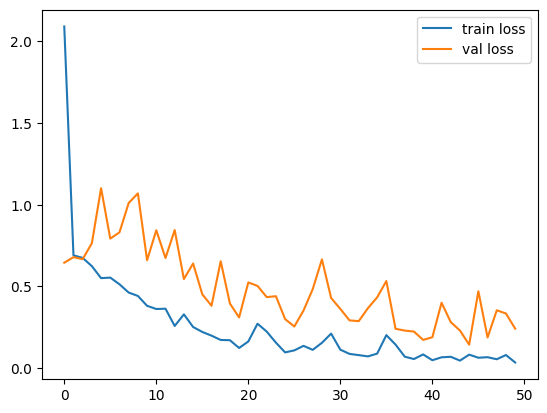

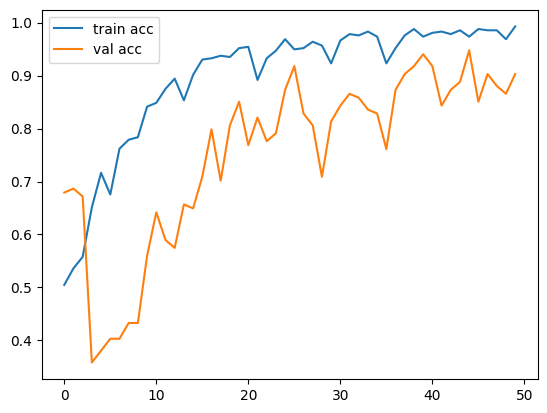

<Figure size 640x480 with 0 Axes>

In [57]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [80]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [81]:
y_pred = model.predict(test_set)

5/5 [==============================] - 1s 92ms/step


In [83]:
y_pred

array([[9.99644041e-01, 3.55938770e-04],
       [9.99978662e-01, 2.13410858e-05],
       [7.76064256e-03, 9.92239356e-01],
       [9.99989629e-01, 1.03406464e-05],
       [9.49054122e-01, 5.09459078e-02],
       [1.00000000e+00, 1.62142452e-11],
       [1.00000000e+00, 2.28914651e-10],
       [9.99733984e-01, 2.65987474e-04],
       [9.99939919e-01, 6.00930762e-05],
       [9.99999285e-01, 7.26609301e-07],
       [9.99998331e-01, 1.64257563e-06],
       [9.99984980e-01, 1.49707412e-05],
       [7.10661173e-01, 2.89338887e-01],
       [9.99629498e-01, 3.70519032e-04],
       [1.61300190e-02, 9.83869970e-01],
       [9.98951554e-01, 1.04837073e-03],
       [1.46118654e-02, 9.85388100e-01],
       [1.48598300e-02, 9.85140145e-01],
       [1.00000000e+00, 4.03952566e-12],
       [9.99971628e-01, 2.84124544e-05],
       [9.89833832e-01, 1.01661934e-02],
       [1.49523780e-01, 8.50476265e-01],
       [9.99448955e-01, 5.51073696e-04],
       [9.99981523e-01, 1.84679357e-05],
       [9.999998

In [84]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [85]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1], dtype=int64)

In [86]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [87]:
model=load_model('model_vgg19.h5')

In [115]:
img=image.load_img('C:/Malaria-Detection_NM/Dataset/Dataset/Test/Uninfected/C3thin_original_IMG_20150608_163002_cell_93.png',target_size=(224,224))

In [117]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [118]:
x.shape

(224, 224, 3)

In [119]:
x=x/255

In [120]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [121]:
model.predict(img_data)

1/1 [==============================] - 0s 56ms/step


array([[1., 0.]], dtype=float32)

In [122]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 38ms/step


In [124]:
if(a==1):
    print("Infected")
else:
    print("Uninfected")

Uninfected


In [107]:
img=image.load_img('C:/Malaria-Detection_NM/Dataset/Dataset/Test/Parasite/P.png',target_size=(224,224))

In [108]:
x=image.img_to_array(img)
x


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [109]:
x.shape

(224, 224, 3)

In [110]:
x=x/255

In [111]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [112]:
model.predict(img_data)

1/1 [==============================] - 0s 37ms/step


array([[1., 0.]], dtype=float32)

In [113]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 38ms/step


In [125]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
